<a href="https://colab.research.google.com/github/Ghisbe/Alertas_pictogramas/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis exploratorio de datos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
import gdown

In [3]:
url ="https://drive.google.com/uc?export=download&id=1b4v3nFIp4th4nVcxOeW09A6Oc2wtuOqi"

In [4]:
output = 'df_definitivo.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1b4v3nFIp4th4nVcxOeW09A6Oc2wtuOqi
From (redirected): https://drive.google.com/uc?export=download&id=1b4v3nFIp4th4nVcxOeW09A6Oc2wtuOqi&confirm=t&uuid=7442b49f-aee7-4c0c-b4d9-634592648480
To: /content/df_definitivo.csv
100%|██████████| 1.51G/1.51G [00:15<00:00, 96.1MB/s]


'df_definitivo.csv'

In [5]:
df = pd.read_csv(output)

In [6]:
df

,id,event,description,instruction,urgency,severity
0,5ed3a4b2283336e2e7db3a1c,Special Weather Statement,"At 630 AM MDT/530 AM PDT/, Doppler radar was t...",Frequent cloud to ground lightning is occurrin...,Expected,Moderate
1,5ed3a07c283336e2e7d2bfa4,Flood Warning,...The National Weather Service in Billings MT...,Safety message...A river Flood Warning means r...,Expected,Severe
2,5ed39e54283336e2e7d22306,Flood Advisory,"At 502 AM PDT, Gauge reports continue to indic...",A Flood Advisory means river or stream flows a...,Expected,Minor
3,5ed39e11283336e2e7d15e23,Flood Watch,The National Weather Service in Spokane has is...,A Flood Watch means there is a potential for f...,Future,Severe
4,5ed3962c283336e2e7c1d935,Flood Warning,The Flood Warning has been cancelled and is no...,Safety message...Motorists should not attempt ...,Past,Minor
...,...,...,...,...,...,...
1497255,613a5aee434e34d5ee03f0e1,Special Weather Statement,"At 814 AM CDT, Doppler radar was tracking a st...","If outdoors, consider seeking shelter inside a...",Expected,Moderate
1497256,613a5c5b434e34d5ee06813a,Special Weather Statement,"At 816 AM CDT, Doppler radar was tracking a st...","If outdoors, consider seeking shelter inside a...",Expected,Moderate
1497257,613a5c5b434e34d5ee06813f,Flash Flood Watch,The National Weather Service in El Paso Tx/San...,You should monitor later forecasts and be prep...,Future,Severe
1497258,613a5d4d434e34d5ee06a9a9,Dense Fog Advisory,* WHAT...Visibility around 1/4 mile or less in...,"If driving, slow down, use your headlights, an...",Expected,Moderate


Cantidad por tipo de evento

In [7]:
pip install matplotlib seaborn pandas

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
event_counts = df['event'].value_counts()
print(event_counts)

event
Flood Warning                         266209
Severe Thunderstorm Warning           218111
Special Weather Statement             152964
Winter Weather Advisory               145878
Flood Advisory                         84771
                                       ...  
Extreme Cold Warning (Alaska only)         1
Severe Weather                             1
HURRICANE WATCH                            1
severe thunderstorm warning                1
Peach Creek Flooding Event                 1
Name: count, Length: 65, dtype: int64


In [10]:
# Filtra los eventos con cantidad mayor a 100
filtered_event_counts = event_counts[event_counts > 100]

<ipython-input-11-e595ca1563a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_event_counts.index, y=filtered_event_counts.values, palette='viridis')


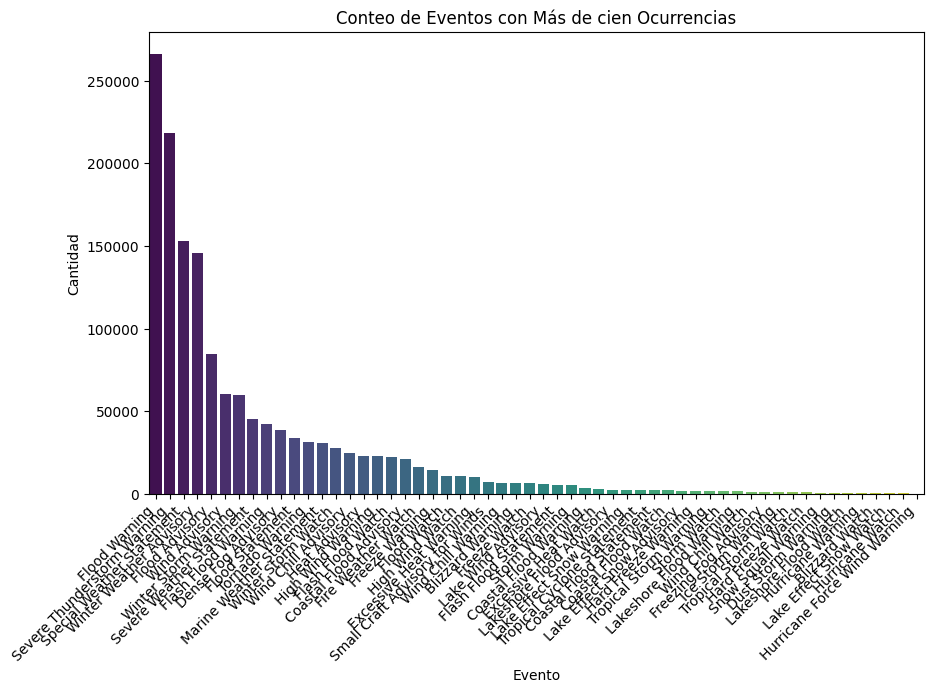

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_event_counts.index, y=filtered_event_counts.values, palette='viridis')
plt.title('Conteo de Eventos con Más de cien Ocurrencias')
plt.xlabel('Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

Cantidad por Severidad.

In [12]:
severity_counts = df['severity'].value_counts()

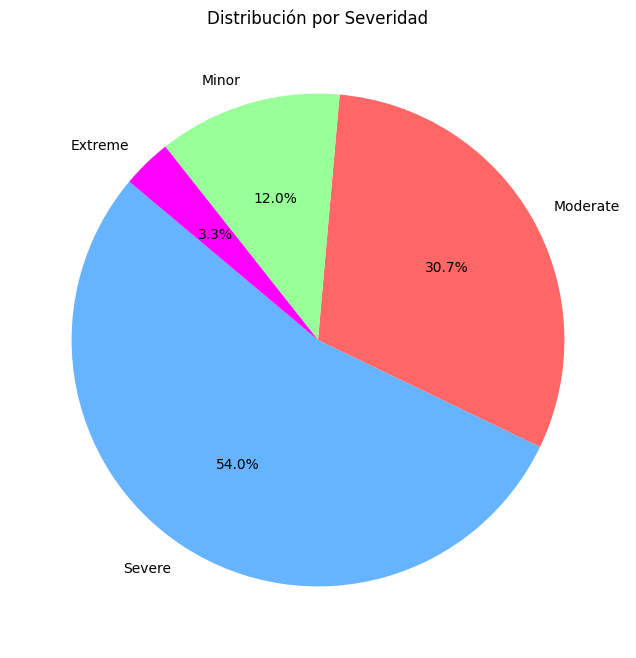

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666','#99ff99', '#FF00FF'])
plt.title('Distribución por Severidad')
plt.show()

Para facilitar el tratamiento de los datos filtramos los registros que contienen la palabra 'Storm' en la columna 'event'.

In [14]:
filtro_df = df[df['event'].str.contains(r'\bStorm\b', case=False, na=False)]

In [15]:
filtro_df

,id,event,description,instruction,urgency,severity
83,5ed30eb3283336e2e7c8a2a8,Dust Storm Warning,The National Weather Service in Phoenix has is...,Motorists should not drive into a dust storm. ...,Expected,Severe
3341,5e6daf2c023f1930efa590ce,Tropical Storm Warning,* WHAT...Winds 30 to 40 kt and seas 5 to 8 ft....,Mariners should alter plans to avoid these haz...,Immediate,Severe
3342,5e6daf2c023f1930efa590d1,Tropical Storm Warning,* WHAT...Northeast winds 25 to 35 kt and waves...,Mariners should alter plans to avoid these haz...,Immediate,Severe
12649,5ec39d7a283336e2e72df524,Winter Storm Warning,The Winter Storm Warning has been cancelled an...,A Winter Weather Advisory for snow means perio...,Past,Minor
12714,5e6daf5b023f1930efa6728d,Winter Storm Warning,...Snow Showers for Higher Mountain Elevations...,A Winter Storm Warning for snow means there wi...,Expected,Severe
...,...,...,...,...,...,...
1493249,612fd6e4434e34d5ee4071f1,Tropical Storm Warning,The Tropical Storm Warning has been cancelled ...,"Inexperienced mariners, especially those opera...",Past,Minor
1493332,612fe1a8434e34d5ee57f113,Tropical Storm Warning,* WHAT...South winds 25 to 35 kt with gusts up...,Mariners should alter plans to avoid these haz...,Immediate,Severe
1493431,612ffb83434e34d5ee8ba1db,Tropical Storm Warning,* WHAT...Southeast winds 20 to 30 kt with gust...,Mariners should alter plans to avoid these haz...,Immediate,Severe
1493721,61302c4b434e34d5eef00bcd,Tropical Storm Warning,The Tropical Storm Warning has been cancelled ...,"Inexperienced mariners, especially those opera...",Past,Minor


Contamos por tipo de evento.

In [16]:
event_counts = filtro_df['event'].value_counts()
print(event_counts)

event
Winter Storm Warning      59686
Winter Storm Watch        27558
Storm Warning              5327
Tropical Storm Warning     1944
Storm Watch                1852
Ice Storm Warning          1258
Tropical Storm Watch        989
Dust Storm Warning          673
Name: count, dtype: int64


Cantidad de ocurrencias por evento.

<ipython-input-18-f8b16bb14dd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


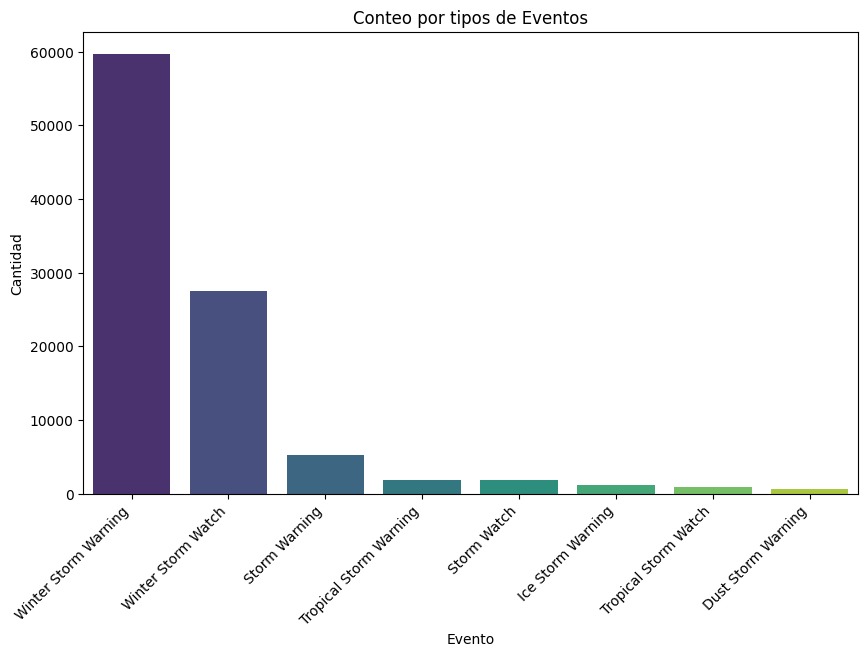

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Conteo por tipos de Eventos')
plt.xlabel('Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
promedio = event_counts.mean()
print(f"El promedio de las cantidades por tipo de evento es: {promedio}")

El promedio de las cantidades por tipo de evento es: 12410.875


Cantidad de ocurrencias por nivel de severidad.

In [19]:
severity_counts = filtro_df['severity'].value_counts()

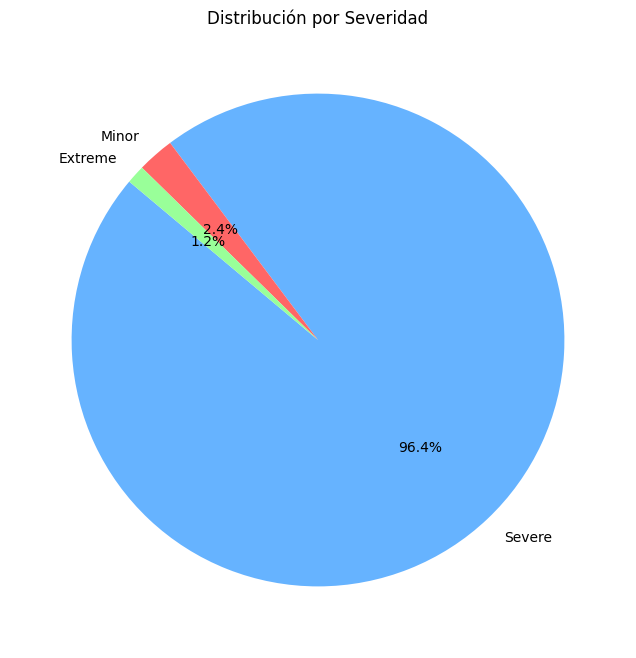

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666','#99ff99', '#FF00FF'])
plt.title('Distribución por Severidad')
plt.show()